Cell Canada - Segmentation de la clientèle

In [400]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing
import decimal
import matplotlib.pyplot as plt 

from sklearn.datasets import make_blobs
import math
import scipy.stats as stats
import pickle
from sklearn.decomposition import PCA
from matplotlib import colors

Nettoyage des données

In [401]:
# Ouverture du fichier et visalisation des données
df = pd.read_excel('GIS812_Donn_es.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Kids,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [402]:
# Visualisation des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7052 entries, 0 to 7051
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7052 non-null   object 
 1   gender            7052 non-null   object 
 2   SeniorCitizen     7052 non-null   int64  
 3   Partner           7052 non-null   object 
 4   Kids              7050 non-null   object 
 5   tenure            7052 non-null   int64  
 6   PhoneService      7052 non-null   object 
 7   MultipleLines     7052 non-null   object 
 8   InternetService   7052 non-null   object 
 9   OnlineSecurity    7052 non-null   object 
 10  OnlineBackup      7052 non-null   object 
 11  DeviceProtection  7052 non-null   object 
 12  TechSupport       7052 non-null   object 
 13  StreamingTV       7052 non-null   object 
 14  StreamingMovies   7052 non-null   object 
 15  Contract          7049 non-null   object 
 16  PaperlessBilling  7052 non-null   object 


In [403]:
# Modification du type de données pour MonthlyCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [404]:
# Afficher les statistiques
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7052.000000,7052.000000,7048.000000,7041.000000
mean,0.161940,32.363443,64.775844,2283.294568
std,0.368422,24.560813,30.083925,2266.883289
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.537500,401.100000
50%,0.000000,29.000000,70.350000,1397.300000
75%,0.000000,55.000000,89.850000,3795.450000
max,1.000000,72.000000,118.750000,8684.800000


In [405]:
# Remplacement de la donnée 'No internet service' pour 'No'
cols = ['OnlineBackup','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTV']
for i in cols :
    df[i] = df[i].replace({'No internet service' : 'No'})

In [406]:
# Remplacement de la donnée 'No phone service' pour 'No'
cols = ['MultipleLines']
for i in cols :
    df[i] = df[i].replace({'No phone service' : 'No'})

In [407]:
# Validation des changements
df.head()

,customerID,gender,SeniorCitizen,Partner,Kids,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [408]:
# Voir s'il y a des valeurs manquantes
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Kids                 2
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             3
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       4
TotalCharges        11
Churn                0
dtype: int64

In [409]:
# Sortir les moyennes des variables 'MonthlyCharges' et 'TotalCharges'
print(df['MonthlyCharges'].mean())
print(df['TotalCharges'].mean())

64.77584421112378
2283.2945675330247


In [410]:
# Sortir la fréquence de la variable 'Kids' 
df.groupby(['Kids']).count()

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Kids,,,,,,,,,,,,,,,,,,,,
No,4939,4939,4939,4939,4939,4939,4939,4939,4939,4939,4939,4939,4939,4939,4937,4939,4939,4936,4939,4939
Yes,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2111,2110,2111,2111,2110,2100,2111


In [411]:
# Sortir la fréquence de la variable 'Contract' 
df.groupby(['Contract']).count()

,customerID,gender,SeniorCitizen,Partner,Kids,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Contract,,,,,,,,,,,,,,,,,,,,
Month-to-month,3878,3878,3878,3878,3877,3878,3878,3878,3878,3878,3878,3878,3878,3878,3878,3878,3878,3875,3878,3878
One year,1476,1476,1476,1476,1475,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1475,1476
Two year,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1694,1685,1695


In [412]:
# Remplacer les données manquantes
df['Kids'] = df['Kids'].fillna('No')
df['Contract'] = df['Contract'].fillna('Month-to-month')
df['MonthlyCharges']=df['MonthlyCharges'].replace(np.NaN, df['MonthlyCharges'].mean())
df['TotalCharges']=df['TotalCharges'].replace(np.NaN, df['TotalCharges'].mean())

In [413]:
# Voir s'il y a des lignes en double
LignesEnDouble = df[df.duplicated()]
print("Lignes en double (à l'exception de la première occurrence):")
print(LignesEnDouble)

Lignes en double (à l'exception de la première occurrence):
      customerID  gender  SeniorCitizen Partner Kids  tenure PhoneService  \
45    4080-IIARD  Female              0     Yes   No      13          Yes   
3211  8149-RSOUN  Female              0      No   No       1          Yes   
3226  3082-VQXNH    Male              0     Yes   No       3           No   
4203  4088-YLDSU    Male              0     Yes   No      55          Yes   
4701  9128-CPXKI  Female              0      No   No      59          Yes   
4712  6595-COKXZ  Female              0      No   No       1          Yes   
5192  3021-VLNRJ  Female              0      No  Yes      50          Yes   
5681  6260-XLACS    Male              0      No   No       4          Yes   
6233  2330-PQGDQ    Male              0     Yes  Yes      51          Yes   

     MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
45             Yes             DSL            Yes  ...               No   
3211           Yes 

In [414]:
df = df.drop_duplicates(subset=['customerID'], keep='first')

Analytique des données

In [415]:
#Numérisation des valeurs pour chaque variable
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
del df_numerized['customerID']

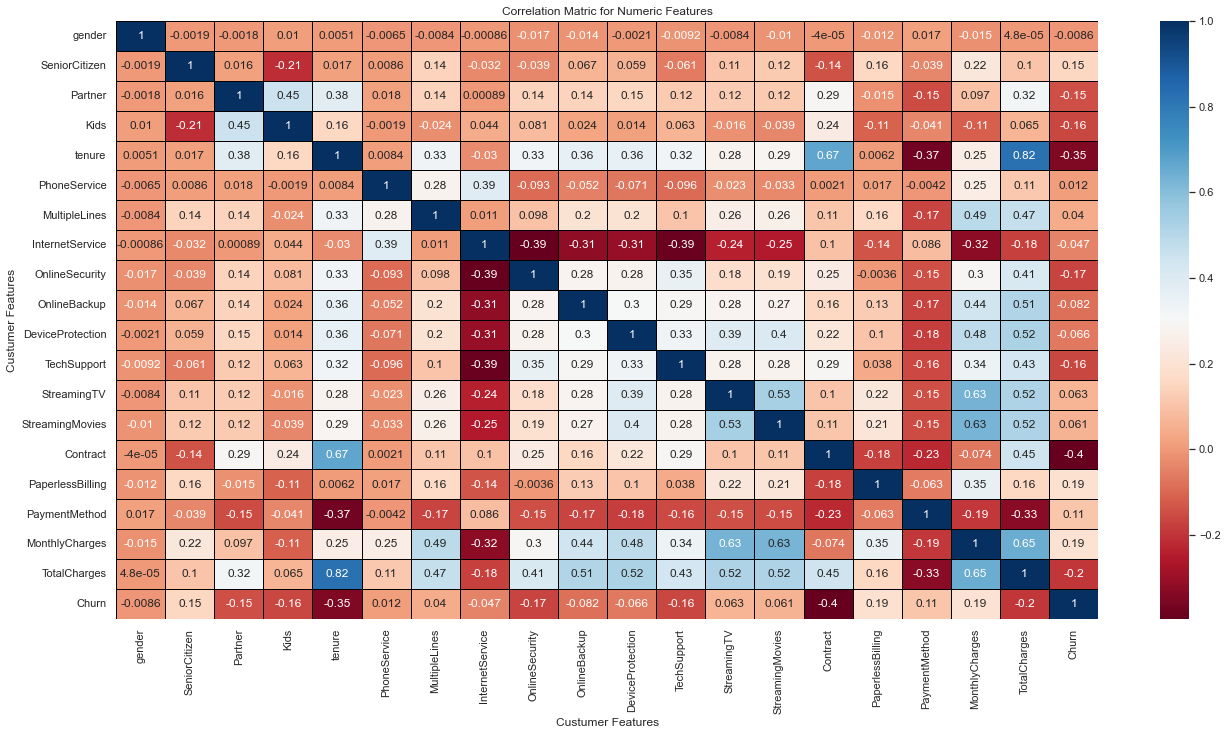

In [416]:
#HeatMap des corréaltions entre variables
correlation_matrix = df_numerized.corr(method='pearson') 
sns.set(rc = {'figure.figsize':(22,11)})
sns.heatmap(correlation_matrix, cmap='RdBu',linewidth=1, linecolor='black', annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Custumer Features')
plt.ylabel('Custumer Features')
plt.show()

In [417]:
#Tableau des corrélation entre variables
df_numerized.corr()

,gender,SeniorCitizen,Partner,Kids,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010211,0.005106,-0.006488,-0.008414,-0.000863,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,-0.000040,-0.011754,0.017352,-0.014886,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211077,0.016567,0.008576,0.142948,-0.032310,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142342,0.156530,-0.038551,0.220138,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452417,0.379697,0.017706,0.142057,0.000891,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294985,-0.014877,-0.154798,0.096978,0.318812,-0.150448
Kids,0.010211,-0.211077,0.452417,1.000000,0.159423,-0.001863,-0.024264,0.044123,0.081179,0.023899,0.014189,0.063475,-0.016315,-0.039500,0.243089,-0.111019,-0.040711,-0.113273,0.064711,-0.164057
tenure,0.005106,0.016567,0.379697,0.159423,1.000000,0.008448,0.331941,-0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.670966,0.006152,-0.370436,0.248093,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001863,0.008448,1.000000,0.279690,0.387436,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002080,0.016505,-0.004184,0.247606,0.112851,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024264,0.331941,0.279690,1.000000,0.011124,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.106525,0.163530,-0.171026,0.490776,0.468689,0.040102
InternetService,-0.000863,-0.032310,0.000891,0.044123,-0.030359,0.387436,0.011124,1.000000,-0.393013,-0.314737,-0.306805,-0.389382,-0.242532,-0.250343,0.099642,-0.138625,0.086140,-0.322937,-0.175429,-0.047291
OnlineSecurity,-0.017021,-0.038653,0.143106,0.081179,0.327203,-0.092893,0.098108,-0.393013,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245875,-0.003636,-0.150100,0.296110,0.412245,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023899,0.360277,-0.052312,0.202237,-0.314737,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155111,0.126735,-0.170898,0.441757,0.509692,-0.082255


In [418]:
#Corrélation entre variables
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()

In [419]:
#Classement des corrélations entre les variables
sorted_pairs = corr_pairs.sort_values()
sorted_pairs['Churn']

Contract           -0.396440
tenure             -0.352229
TotalCharges       -0.199428
OnlineSecurity     -0.171226
TechSupport        -0.164674
Kids               -0.164057
Partner            -0.150448
OnlineBackup       -0.082255
DeviceProtection   -0.066160
InternetService    -0.047291
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.040102
StreamingMovies     0.061382
StreamingTV         0.063228
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193738
Churn               1.000000
dtype: float64

In [420]:
#Classement des corrélation les plus fortes entre variables
high_corr = sorted_pairs[(sorted_pairs) > 0.4]
high_corr

DeviceProtection  StreamingMovies     0.402111
StreamingMovies   DeviceProtection    0.402111
TotalCharges      OnlineSecurity      0.412245
OnlineSecurity    TotalCharges        0.412245
TotalCharges      TechSupport         0.432480
TechSupport       TotalCharges        0.432480
OnlineBackup      MonthlyCharges      0.441757
MonthlyCharges    OnlineBackup        0.441757
TotalCharges      Contract            0.448715
Contract          TotalCharges        0.448715
Partner           Kids                0.452417
Kids              Partner             0.452417
TotalCharges      MultipleLines       0.468689
MultipleLines     TotalCharges        0.468689
DeviceProtection  MonthlyCharges      0.482283
MonthlyCharges    DeviceProtection    0.482283
                  MultipleLines       0.490776
MultipleLines     MonthlyCharges      0.490776
TotalCharges      OnlineBackup        0.509692
OnlineBackup      TotalCharges        0.509692
StreamingTV       TotalCharges        0.515314
TotalCharges 

In [421]:
#Corrélation les plus fortes entre variable

#Contract          Churn              -0.396440
#Partner           Kids                0.452417
#StreamingMovies   StreamingTV         0.533094
#StreamingTV       MonthlyCharges      0.629249
#StreamingMovies   MonthlyCharges      0.627073
#tenure            Contract            0.670966

#Nous pouvons faire les observations suivantes :
    
#1. Plus un contract est long, moins les clients ont tendances à quitter la compagnie.
#2. Un client ayant ayant un partenaire à tendance à avoir un ou des enfants.
#3. Pour chaque client ayant le service de 'StreamingMovies',
#il y a plus de chance qu'il ait également le service de 'StreamingTv'.
#4. Pour chaque client ayant le service de 'StreamingMovies' ou 'StremingTv', plus la facture par mois est élevé.
#5. Plus le contrat d'un client est long, plus le nombre de mois de fidélité du client augmente.

K-Means

In [422]:
# Préâration des données pour K-Means
df = df.apply(preprocessing.LabelEncoder().fit_transform) 

In [423]:
ds = df
scaler = StandardScaler()
ds = pd.DataFrame(scaler.fit_transform(ds), columns=df.columns)

In [424]:
df.head()

,gender,SeniorCitizen,Partner,Kids,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,730,674,1


In [425]:
pca = PCA(n_components=3)
pca_ds = pd.DataFrame(pca.fit_transform(ds), columns=['comp1', 'comp2', 'comp3'])

In [426]:
pca_ds.head()

,comp1,comp2,comp3
0,-2.026499,0.114262,2.860193
1,-0.483682,-0.758730,1.484925
2,-1.877563,1.672936,1.737084
3,0.525358,-1.557567,3.745317
4,-2.737714,1.711149,-0.004356


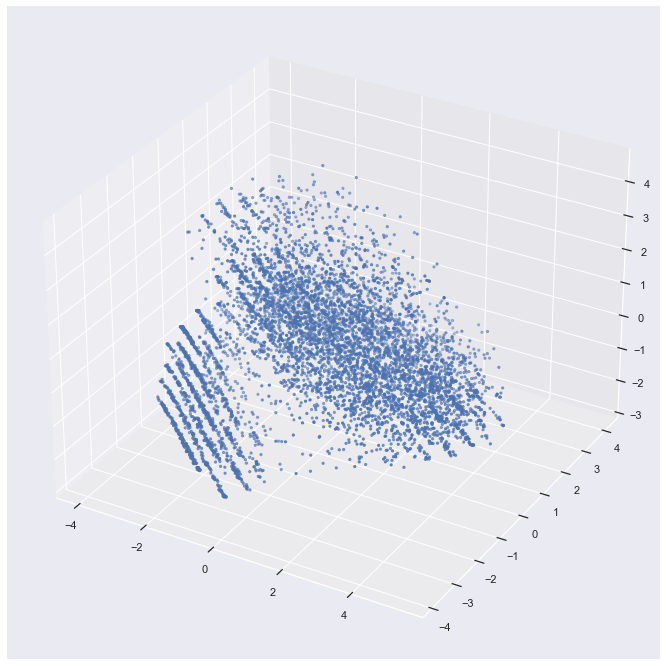

In [427]:
#Plot dataset
x = pca_ds['comp1']
y = pca_ds['comp2']
z = pca_ds['comp3']
cmap = colors.ListedColormap(["#C1106F", "#1710C1", "#10C118", "#E08D03"])
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker=".", cmap=cmap)
plt.show()

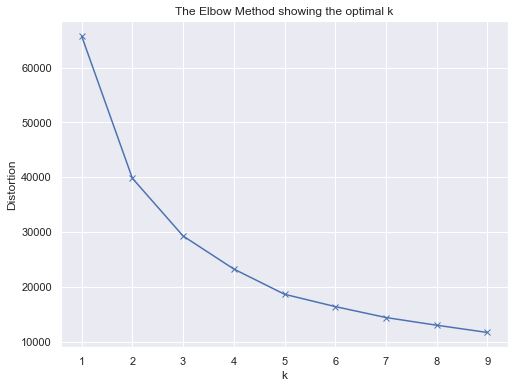

In [428]:
distortions = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(pca_ds)
  distortions.append(kmeanModel.inertia_)
  
plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Selon le ''Elbow Method'' nombre optimal de clusters est : 4

In [429]:
kmeans = KMeans(n_clusters=4, init='k-means++')
y_kmeans = kmeans.fit_predict(pca_ds)
df['Cluster'] = y_kmeans
pca_ds["Cluster"] = y_kmeans

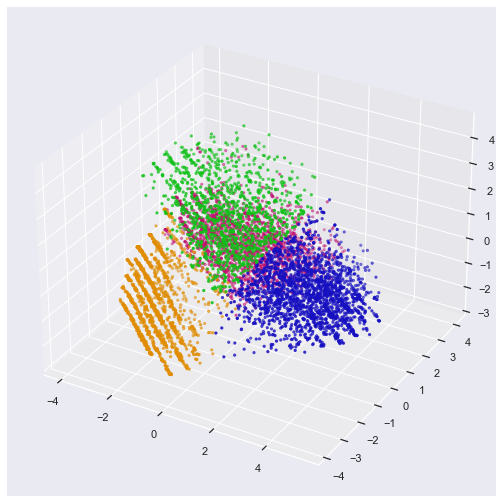

In [430]:
# Plot dataset
cmap = colors.ListedColormap(["#C1106F", "#1710C1", "#10C118", "#E08D03"])
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, c=pca_ds["Cluster"], marker='.', cmap=cmap)
plt.show()

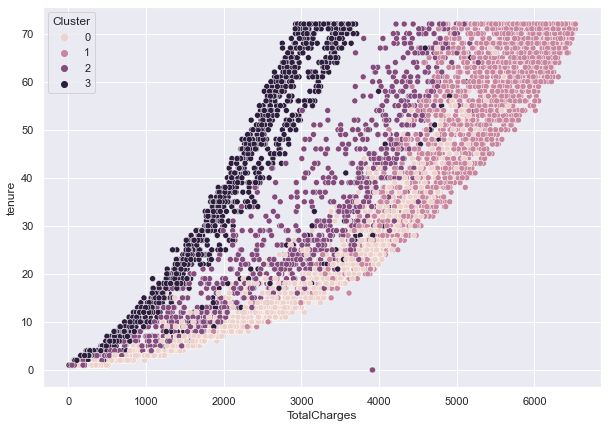

In [431]:
# Distribution des valeurs par variables pour chaque cluster
fig = plt.figure(figsize=(10,7))
sns.scatterplot(data = df,x=df["TotalCharges"], y=df["tenure"],hue=df["Cluster"])
plt.show()

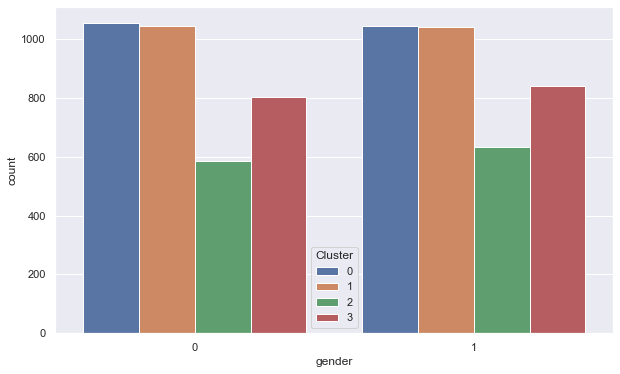

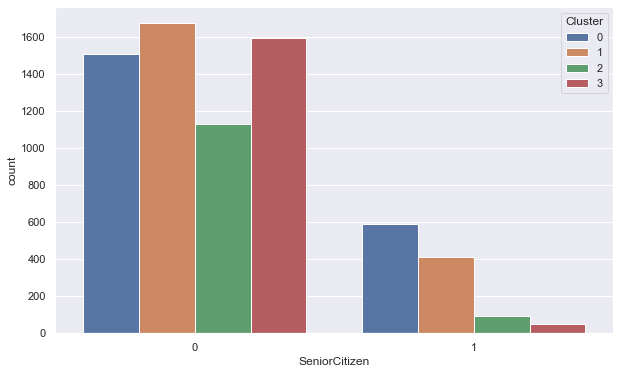

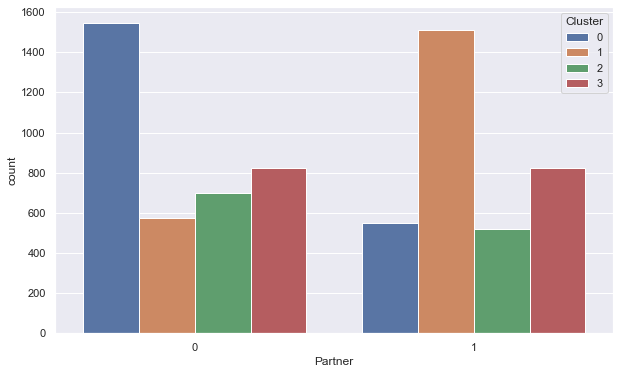

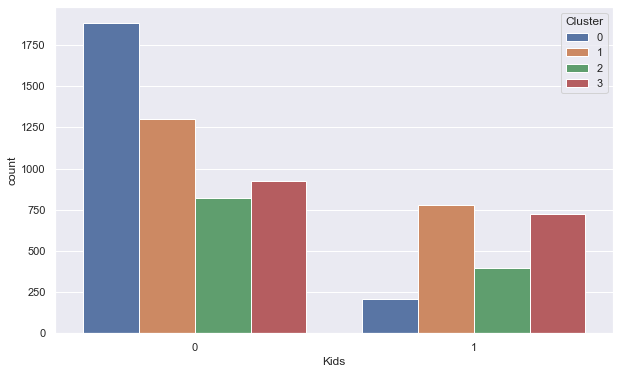

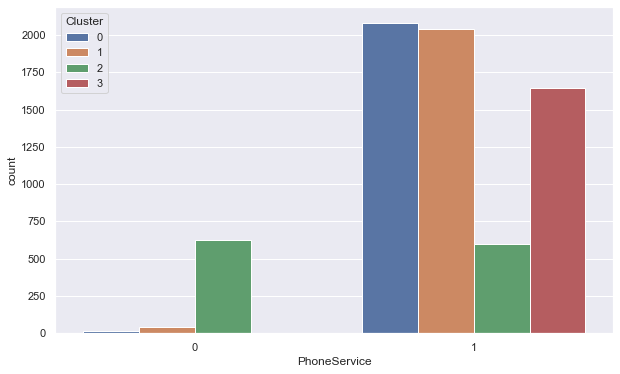

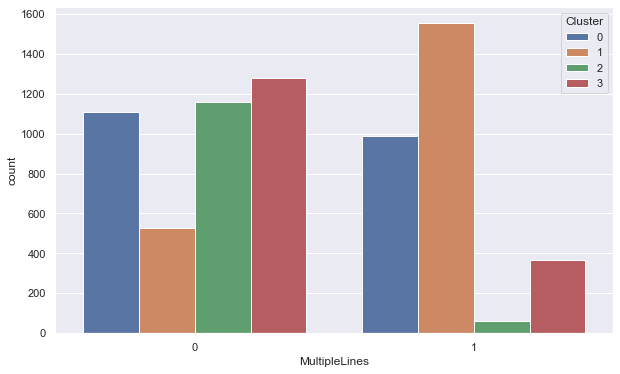

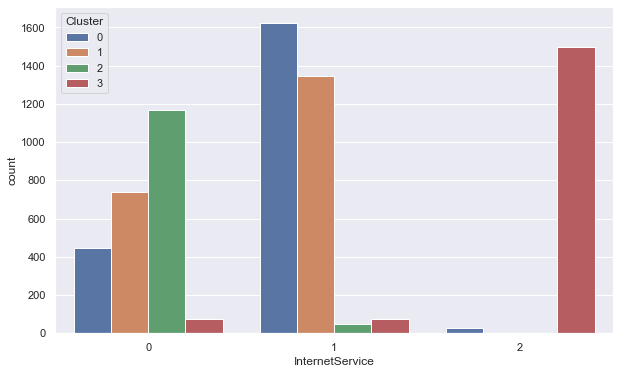

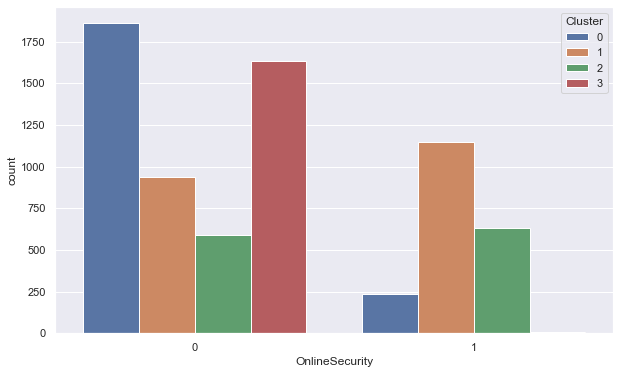

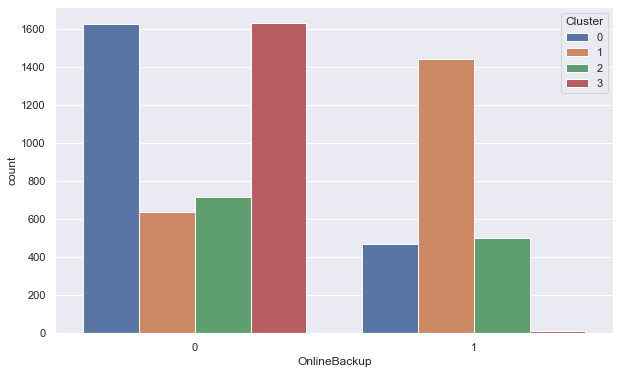

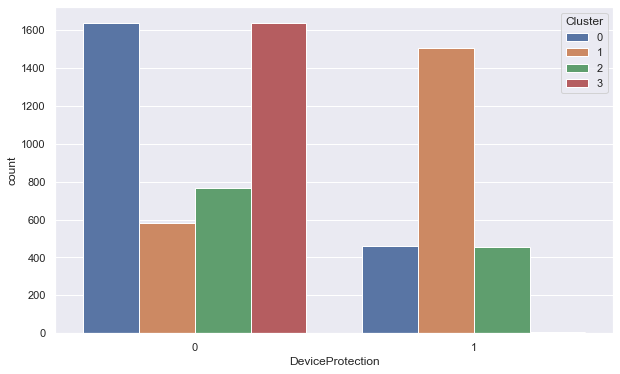

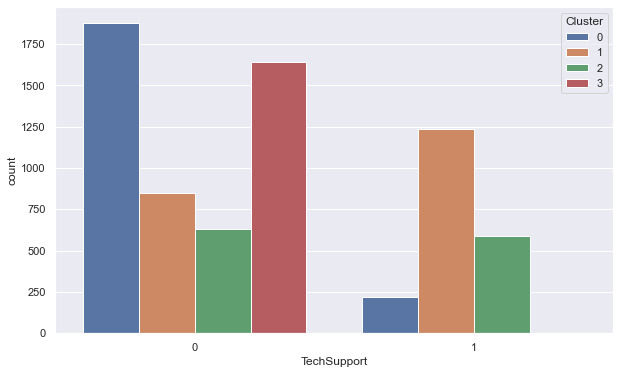

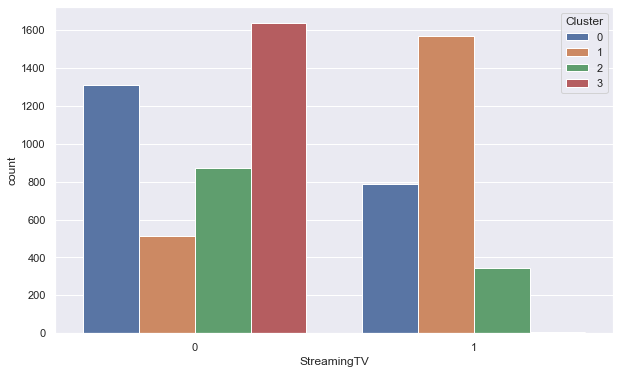

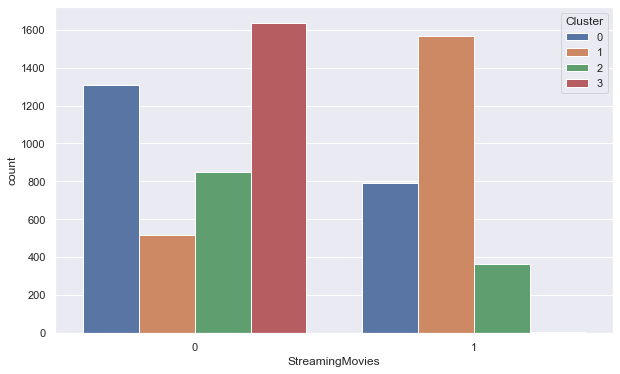

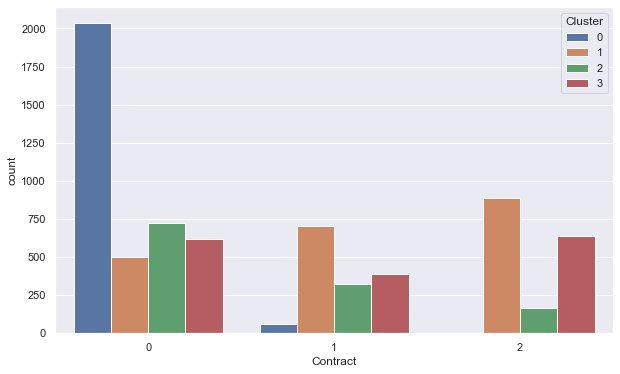

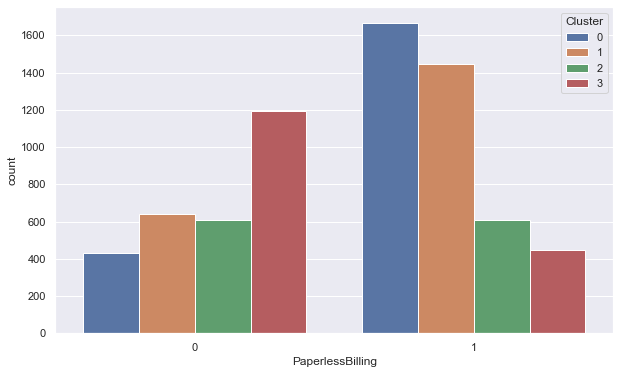

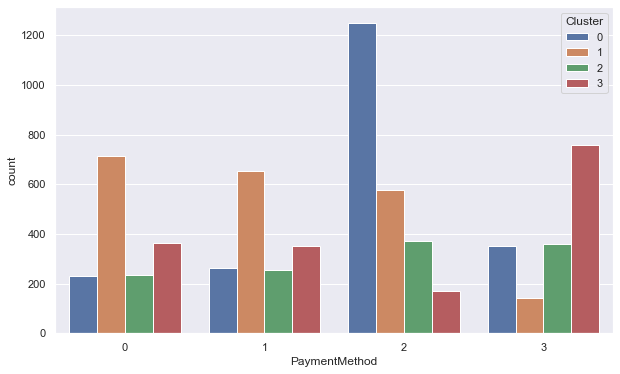

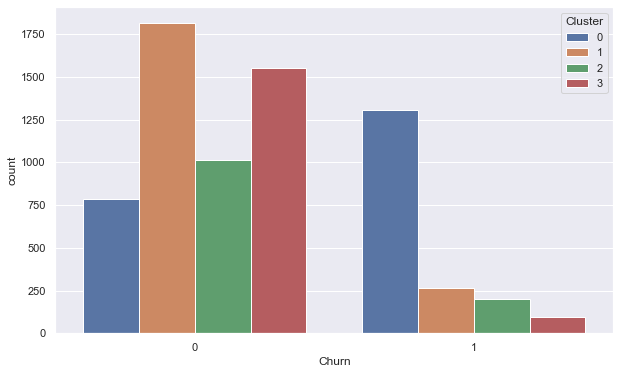

In [432]:
# Distribution des valeurs par variables pour chaque cluster
for col in ['gender', 'SeniorCitizen', 'Partner', 'Kids',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']:
  fig = plt.figure(figsize=(10,6))
  sns.countplot(x=df[col], hue=df["Cluster"])
  plt.show()

Le groupe 'cluster' bleu est le groupe qui contient le plus de client ayant quitté la compagnie.

In [399]:
df.to_excel('df_projet.xlsx')